In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
datos = pd.read_csv(filepath_or_buffer="/users/Liz/Downloads/comprar_alquilar.csv")
print(datos.head())
datos.dropna(inplace=True)

   ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0      6000            1000           0           600    50000    400000   
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   

   estado_civil  hijos  trabajo  comprar  
0             0      2        2        1  
1             1      3        6        0  
2             2      1        8        1  
3             0      0        3        0  
4             0      0        3        1  


In [4]:
X = datos.drop('comprar', axis=1)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
pca = PCA(n_components=None)
X_pca_full = pca.fit_transform(X_scaled)

In [7]:
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

In [8]:
print("Varianza explicada por componente:", varianza_explicada)
print("Varianza acumulada:", varianza_acumulada)

Varianza explicada por componente: [0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
Varianza acumulada: [0.29913557 0.5320848  0.64919721 0.75605343 0.85240621 0.90870487
 0.95016066 0.98033885 1.        ]


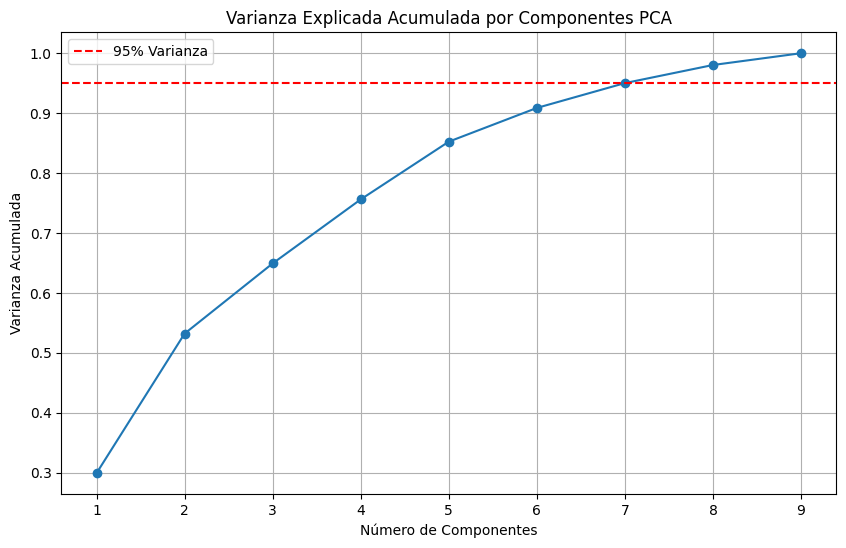

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.title('Varianza Explicada Acumulada por Componentes PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Varianza')
plt.legend()
plt.grid(True)
plt.savefig('varianza_acumulada_pca.png')
plt.show()

In [15]:
n_componentes_95 = np.argmax(varianza_acumulada >= 0.95) + 1
print(f"Componentes necesarios para 95% varianza: {n_componentes_95}")

Componentes necesarios para 95% varianza: 7


In [17]:
pca_vis = PCA(n_components=2)
X_pca = pca_vis.fit_transform(X_scaled)

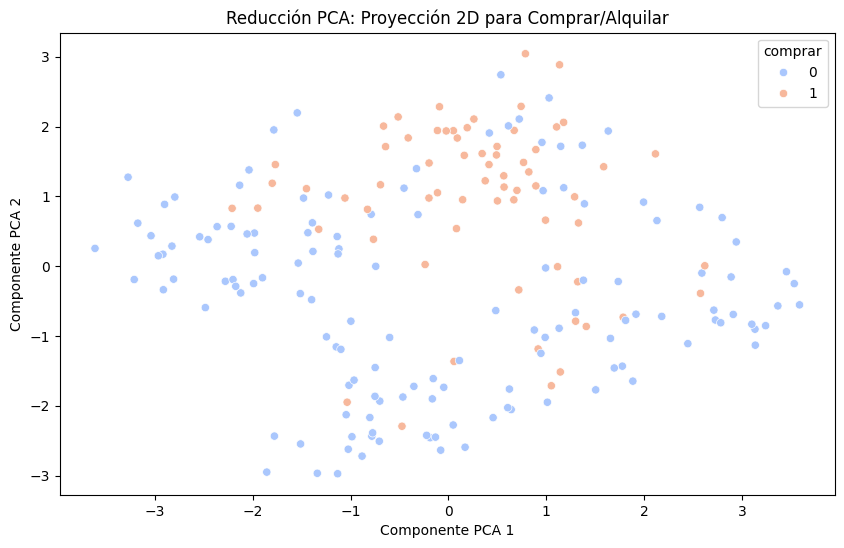

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=datos['comprar'], palette='coolwarm')
plt.title('Reducción PCA: Proyección 2D para Comprar/Alquilar')
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.savefig('pca_2d_comprar_alquilar.png')
plt.show()